# Portfolio Optimization Using DAX Stocks

In this project I'm going to import stock price data for stocks in the DAX 30, Germany's main stock exchange. I will compute common financial statistics, visualise these and perform mean-variance portfolio optimization.

First, import all the necessary libraries/modules:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data
from datetime import datetime

In [12]:
# Define start and end date
start = datetime(2016, 1, 1)
end = datetime(2020, 1, 1)

# Create a list of ticker symbols of stocks in the DAX
dax_symbols = ['1COV', 'ADS', 'ALV', 'BAS', 'BAYN', 'BEI', 'BMW', 'CON', 'DAI', 'DB1', 'DBK', 'DPW', 'DTE', 'DWNI', 'EOAN', 
              'FME', 'FRE', 'HEI', 'HEN3', 'IFX', 'LIN', 'MRK', 'MTX', 'MUV2', 'RWE', 'SAP', 'SIE', 'VNA', 'VOW3', 'WDI']

In [52]:
# Create a list of symbols for which there are issues
list_to_drop = ['1COV', 'BAS', 'BMW', 'CON', 'DB1', 'DBK', 'DWNI', 'EOAN', 'FRE', 'FME', 'HEN3', 'MUV2', 'RWE', 'VNA', 'VOW3', 'WDI']

# Remove the symbols with issues from the list of symbols to analyse
dax_symbols_to_use = list(set(dax_symbols) - set(list_to_drop))
dax_symbols_to_use

['HEI',
 'DAI',
 'LIN',
 'MTX',
 'BAYN',
 'SIE',
 'IFX',
 'ALV',
 'DTE',
 'DPW',
 'MRK',
 'SAP',
 'BEI',
 'ADS']

In [53]:
stocks = data.DataReader(dax_symbols_to_use, data_source='yahoo', start=start, end=end)
stocks

Attributes   Adj Close                                                     \
Symbols            HEI    DAI         LIN        MTX    BAYN    SIE   IFX   
Date                                                                        
2015-12-31   27.566616  28.75   92.726379  45.183792  0.0300  0.010  0.38   
2016-01-04   27.444908  28.75   92.065338  42.760063  0.0300  0.010  0.38   
2016-01-05   28.195435  28.75   91.748398  42.257584  0.0300  0.015  0.38   
2016-01-06   28.352638  28.75   90.824760  40.888069  0.0300  0.015  0.38   
2016-01-07   28.073729  28.75   88.551895  39.124466  0.0300  0.025  0.38   
...                ...    ...         ...        ...     ...    ...   ...   
2019-12-24  116.953484    NaN  209.640076  57.482224  0.0147    NaN   NaN   
2019-12-26  115.324554    NaN  210.759506  57.532127  0.0147    NaN   NaN   
2019-12-27  115.014748    NaN  210.274078  57.142860  0.0147    NaN   NaN   
2019-12-30  114.105347    NaN  209.511307  57.552094  0.0147    NaN   NaN   
2019-12-31  114.075371    NaN  210.908096  57.522152  0.0147    NaN   NaN   

Attributes                                 ... Volume                    \
Symbols           ALV         DTE     DPW  ...   BAYN       SIE     IFX   
Date                                       ...                            
2015-12-31  78.265289   68.013077  432.00  ...    0.0    4200.0  3500.0   
2016-01-04  76.295631   67.122520  464.00  ...    0.0       0.0     0.0   
2016-01-05  73.924538   67.809532  464.00  ...    0.0    5500.0     0.0   
2016-01-06  72.350082   67.504196  480.00  ...    0.0   34250.0     0.0   
2016-01-07  69.909958   66.766312  472.00  ...    0.0  396050.0     0.0   
...               ...         ...     ...  ...    ...       ...     ...   
2019-12-24  83.689018  125.513458    1.23  ...    0.0       NaN     NaN   
2019-12-26  83.846039  125.895401    1.20  ...    0.0       NaN     NaN   
2019-12-27  84.120811  126.218597    1.19  ...    0.0       NaN     NaN   
2019-12-30  83.090401  126.355705    1.19  ...    0.0       NaN     NaN   
2019-12-31  82.835251  127.188141    1.19  ...    0.0       NaN     NaN   

Attributes                                                               \
Symbols          ALV        DTE       DPW         MRK        SAP    BEI   
Date                                                                      
2015-12-31  283700.0   979900.0       0.0   8292900.0   267900.0    0.0   
2016-01-04  563500.0  1408300.0       0.0  17174600.0  1075400.0  211.0   
2016-01-05  640200.0  1259100.0       0.0  11075500.0  1392000.0    0.0   
2016-01-06  521000.0  2098600.0       0.0  12465900.0  1031600.0    0.0   
2016-01-07  743100.0  1421400.0       0.0  12720000.0  1670200.0  360.0   
...              ...        ...       ...         ...        ...    ...   
2019-12-24   69700.0   340100.0  246700.0   2235900.0   117900.0    NaN   
2019-12-26   83400.0   602300.0  141100.0   2922400.0   170000.0    NaN   
2019-12-27  270100.0   695200.0   72000.0   3586800.0   357200.0    NaN   
2019-12-30  203100.0  1364400.0       0.0   3752800.0   257200.0    NaN   
2019-12-31  166300.0   837800.0       0.0   4495000.0   299300.0    NaN   

Attributes            
Symbols          ADS  
Date                  
2015-12-31  267000.0  
2016-01-04  477400.0  
2016-01-05  363000.0  
2016-01-06  514300.0  
2016-01-07  605100.0  
...              ...  
2019-12-24  189200.0  
2019-12-26  438100.0  
2019-12-27  465900.0  
2019-12-30  475200.0  
2019-12-31  602600.0  

[1007 rows x 84 columns]

In [61]:
# Get the adjusted closing prices
closing_prices = stocks['Adj Close']

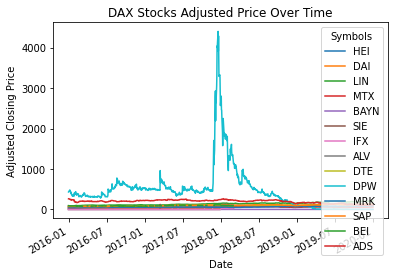

In [64]:
# Plot the price movements over the selecte dtime period
closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("DAX Stocks Adjusted Price Over Time")
plt.show()

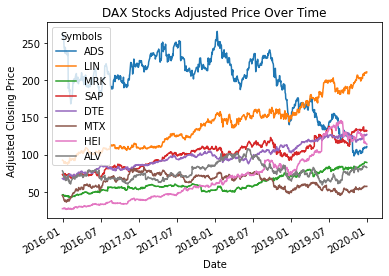

In [63]:
# List of stocks to keep in the analysis
include = ['ADS', 'LIN', 'MRK', 'SAP', 'DTE', 'MTX', 'HEI', 'ALV']

# Run the plot again
closing_prices[include].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("DAX Stocks Adjusted Price Over Time")
plt.show()

In [66]:
final_dax_stocks = closing_prices[include]

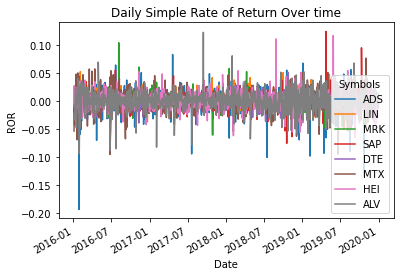

In [70]:
# Calculate daily simple rate of return and plot the result
daily_ror = final_dax_stocks.pct_change()
daily_ror.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.show()

In [77]:
# Caluclate the average daily returns for the 8 companies
avg_ror = daily_ror.mean()

# Sort from highest to lowest
avg_ror.sort_values(inplace=True, ascending=False)
avg_ror

Symbols
HEI    0.001526
LIN    0.000892
MRK    0.000729
SAP    0.000676
DTE    0.000668
MTX    0.000415
ALV    0.000228
ADS   -0.000658
dtype: float64

In [78]:
# Extract the keys
labels = avg_ror.keys()
labels

Index(['HEI', 'LIN', 'MRK', 'SAP', 'DTE', 'MTX', 'ALV', 'ADS'], dtype='object', name='Symbols')

In [79]:
# Get the heights for the bars
height = []
for key in labels:
    height.append(avg_ror[key])
height

[0.001526449304929263,
 0.0008924932949586872,
 0.0007288501646126674,
 0.0006757194762476671,
 0.0006675906654308819,
 0.0004149910976515193,
 0.00022812211388226482,
 -0.0006575791566321612]

In [80]:
# Obtain x-axis positions
x_pos = np.arange(len(labels))
x_pos

array([0, 1, 2, 3, 4, 5, 6, 7])

Text(0.5, 1.0, 'Average daily rate of return for 8 German stocks')

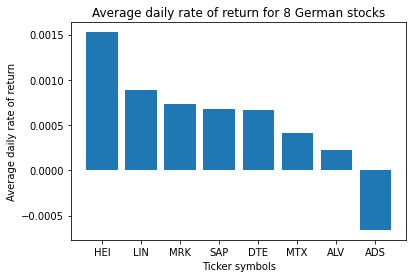

In [81]:
# Create bar chart for the average daiyl returns
plt.bar(x_pos, height)

# Add ticks, axis labels, etc.
plt.xticks(x_pos, labels)
plt.xlabel('Ticker symbols')
plt.ylabel('Average daily rate of return')
plt.title('Average daily rate of return for 8 German stocks')